In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Algerian Forest Fires cleaned Dataset.csv")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
## encoding
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [10]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [138]:
## independent and dependent feature
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [139]:
# Test Train split
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

In [141]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [142]:
## feature selection based on correleation ******
X_train.corr()



,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Figure size 864x720 with 0 Axes>

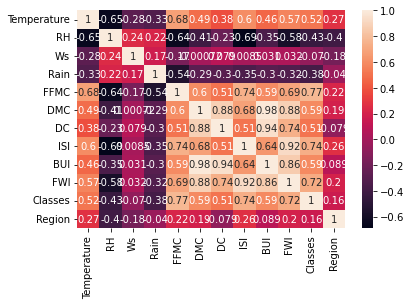

<Figure size 864x720 with 0 Axes>

In [109]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(12,10))

In [121]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [110]:
X_train.corr()
### we have to drop the value which is more correlated  beacuse it can shows same feature ###


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [111]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

A    1
B    4
C    7
Name: X, dtype: int64
X    4
Y    5
Z    6
Name: B, dtype: int64
6


In [51]:
dq

,A,B,C
X,1,4,7
Y,2,5,8
Z,3,6,9


In [112]:
## threshold--Domain expertise
corr_feature= correlation(X_train,0.85)

In [113]:
corr_feature

{'BUI', 'DC'}

In [114]:
# drop  feature when correlation is more than 0.85
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)



In [115]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## feature scaling or standardization

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler=StandardScaler()

In [118]:
X_train_scaled=scaler.fit_transform(X_train)

In [119]:
X_test_scaled=scaler.transform(X_test)

In [123]:
X_train_scaled.shape

(182, 9)

In [125]:
X_test_scaled.shape

(61, 9)

## Box plot to understand effect of standard scaler

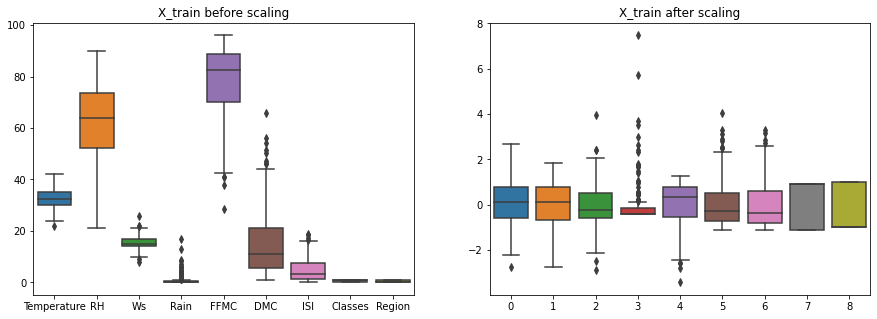

In [128]:
plt.subplots(figsize=(15,5))            
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")
plt.show()

## Linear Regression Model

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [155]:
linear=LinearRegression()

In [156]:
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)


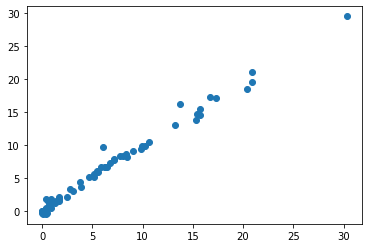

In [179]:
plt.scatter(y_test,y_pred)

In [170]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mae:",mae)
print("mse:",mse)
print("Rmse",rmse)

mae: 0.5468236465249987
mse: 0.6742766873791599
Rmse 0.8211435242265264


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [159]:
score=r2_score(y_test,y_pred)

In [171]:
score

0.9847657384266951

## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

1. R2: The R2 of the model
2. n: The number of observations
3. k: The number of predictor variables

In [186]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

0.9820773393255237

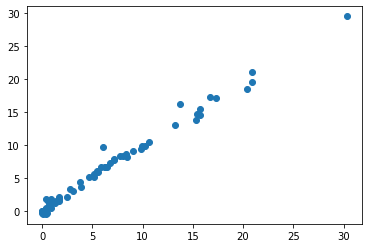

In [172]:
plt.scatter(y_test,y_pred)

## Lasso Regression   

In [193]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
lasso=Lasso()

In [190]:
lasso.fit(X_train_scaled,y_train)

Lasso()

mae: 1.1331759949144085
mse: 2.2483458918974746
rmse: 1.4994485292591655
The accuracy of our model is: 0.9492020263112388


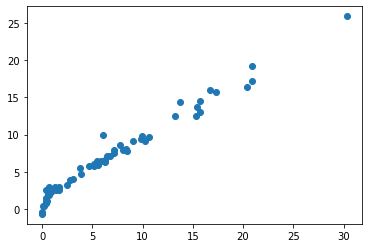

In [199]:

mae=mean_absolute_error(y_test,y_pred_lasso)
mse=mean_squared_error(y_test,y_pred_lasso)
rmse=np.sqrt(mse)
score_lasso=r2_score(y_test,y_pred_lasso)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("The accuracy of our model is:",score_lasso)
plt.scatter(y_test,y_pred_lasso)


## Cross Validation Lasso

In [200]:
from sklearn.linear_model import LassoCV

In [201]:
lassocv=LassoCV(cv=5)

In [203]:
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [204]:
y_pred_lassocv=lassocv.predict(X_test_scaled)

Mean absolute error 0.6199701158263433
R2 Score 0.9820946715928275


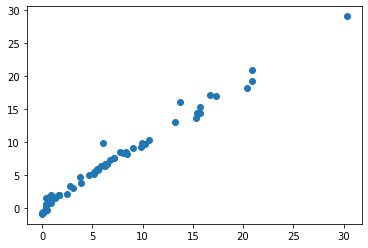

In [205]:
plt.scatter(y_test,y_pred_lassocv)
mae=mean_absolute_error(y_test,y_pred_lassocv)
score_lassocv=r2_score(y_test,y_pred_lassocv)
print("Mean absolute error", mae)
print("R2 Score", score_lassocv)

## Ridge Regression model

mae: 0.5642305340105693
score_ridge: 0.9842993364555513


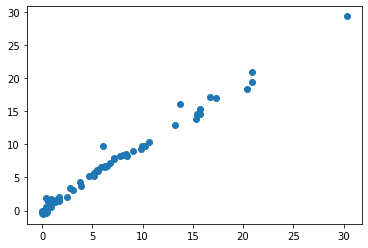

In [214]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
score_ridge=r2_score(y_test,y_pred_ridge)  
print("mae:",mae)
print("score_ridge:",score_ridge)
plt.scatter(y_test,y_pred_ridge)

Mean absolute error 0.5642305340105693
R2 Score 0.9842993364555513


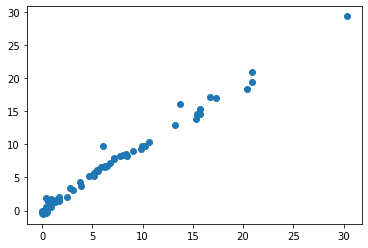

In [215]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [218]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


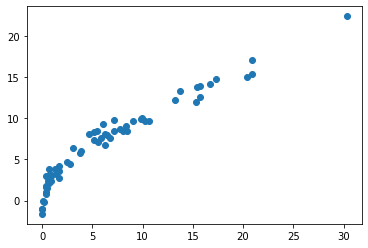

In [216]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [219]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Mean absolute error 0.6575946731430904
R2 Score 0.9814217587854941


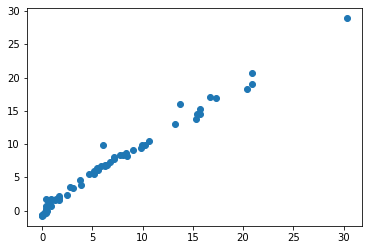

In [220]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [221]:
# pickle the machine learnning model ,preprocessing model standard

In [222]:
scaler

StandardScaler()

In [223]:
ridge

Ridge()

In [226]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))

In [227]:
pickle.dump(ridge,open("ridge.pkl","wb"))